## Question 3 Python
Housing
Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

In [3]:
first_series = pd.Series(np.random.randint(1, high=5, size=100))
second_series = pd.Series(np.random.randint(1, high=4, size=100))
third_series = pd.Series(np.random.randint(10000, high=30001, size=100))
print (first_series, second_series, third_series)

0     4
1     2
2     1
3     3
4     2
     ..
95    2
96    1
97    3
98    1
99    2
Length: 100, dtype: int64 0     2
1     3
2     3
3     3
4     1
     ..
95    3
96    1
97    3
98    1
99    2
Length: 100, dtype: int64 0     19153
1     24686
2     11617
3     14293
4     28591
      ...  
95    22004
96    20132
97    15067
98    21046
99    14347
Length: 100, dtype: int64


Step 3. Create a DataFrame by joinning the Series by column

In [5]:
df_series = pd.concat([first_series, second_series, third_series], axis=1)
df_series.head()

,0,1,2
0,4,2,19153
1,2,3,24686
2,1,3,11617
3,3,3,14293
4,2,1,28591



Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [6]:
df_series.columns = [ "bedrs","bathrs","price_sqr_meter"]
df_series.head()

,bedrs,bathrs,price_sqr_meter
0,4,2,19153
1,2,3,24686
2,1,3,11617
3,3,3,14293
4,2,1,28591



Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'

In [7]:
bigcolumn = df_series['bedrs'].append(df_series['bathrs'].append(df_series['price_sqr_meter']))
bigcolumn

0         4
1         2
2         1
3         3
4         2
      ...  
95    22004
96    20132
97    15067
98    21046
99    14347
Length: 300, dtype: int64

Step 6. Ops it seems it is going only until index 99. Is it true?

Yes, because index has 100 rows from 0 to 99

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [9]:
bigcolumn.reset_index(drop=True)

0          4
1          2
2          1
3          3
4          2
       ...  
295    22004
296    20132
297    15067
298    21046
299    14347
Length: 300, dtype: int64

# Question 4 Python
Wind Statistics

The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.

The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL

MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.

In [3]:
data["Date"]= pd.to_datetime(data[['Yr', 'Mo', 'Dy']]
                .rename(columns={'Yr': 'year',
                                'Mo': 'month',
                                'Dy': 'day'})
               .assign(year=lambda x: x['year']+1900))
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].

In [4]:
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.

In [5]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [6]:
data = data.dropna()
data.isnull().sum()
data.count()

RPT    6546
VAL    6546
ROS    6546
KIL    6546
SHA    6546
BIR    6546
DUB    6546
CLA    6546
MUL    6546
CLO    6546
BEL    6546
MAL    6546
dtype: int64

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.

In [7]:
data.mean(axis=1).mean(axis=0)

10.222465245951703

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.

In [8]:
loc_stats = pd.DataFrame()
loc_stats["min"] = data.min(axis=0)
loc_stats["max"] = data.max(axis=0)
loc_stats["mean"] = data.mean(axis=0)
loc_stats["std"] = data.std(axis=0)
loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.

In [9]:
day_stats = pd.DataFrame()
day_stats["min"] = data.min(axis=1)
day_stats["max"] = data.max(axis=1)
day_stats["mean"] = data.mean(axis=1)
day_stats["std"] = data.std(axis=1)
day_stats.head()

,min,max,mean,std
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237


Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.

In [10]:
data = data.reset_index() 
January_data = data[data['Date'].dt.month == 1]
January_data = January_data.mean(axis = 0)
January_data

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [11]:
data.groupby(data['Date'].dt.year).sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65
1962,4443.47,3674.61,4240.60,2521.09,3870.60,2684.35,3997.61,3196.39,3017.47,3509.16,4700.82,5198.84
1963,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


Step 13. Downsample the record to a monthly frequency for each location.

In [12]:
monthly_data = data
monthly_data.groupby([monthly_data['Date'].dt.year.rename('year'),monthly_data['Date'].dt.month.rename('month')]).sum()

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1961 1      377.16  291.86  336.97  177.84  273.24  212.53  270.48  225.44   
     2      426.45  390.97  376.22  240.31  358.23  283.00  308.57  305.40   
     3      287.82  299.63  281.34  191.72  277.17  231.66  245.93  251.89   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      280.69  237.88  295.10  167.79  265.45  185.75  214.08  229.79   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
year month                                  
1961 1      216.41  246.75  345.02  372.88  
     2      305.46  328.29  472.29  397.82  
     3      272.70  296.72  433.79  416.31  
     4      220.27  217.11  334.42  308.35  
     5      227.38  238.97  333.54  333.53  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

Step 14. Downsample the record to a weekly frequency for each location.

In [13]:
weekly_data = data
weekly_data.groupby([weekly_data['Date'].dt.year.rename('year'),weekly_data['Date'].dt.month.rename('month'), weekly_data['Date'].dt.week.rename('week')]).sum()

RPT     VAL     ROS    KIL     SHA    BIR     DUB    CLA  \
year month week                                                                
1961 1     1      61.58   52.04   50.25  28.29   42.53  31.21   54.68  29.66   
           2      87.28   62.77   83.71  32.41   51.46  35.51   52.75  47.74   
           3      72.60   57.00   70.09  25.76   53.80  41.63   46.97  43.75   
           4     119.28   89.08  105.29  71.50   97.95  84.10   86.70  85.87   
           5      36.42   30.97   27.63  19.88   27.50  20.08   29.38  18.42   
...                 ...     ...     ...    ...     ...    ...     ...    ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17  41.79   51.33  38.84   
           49    145.18  134.33  119.24  68.44  107.01  89.42  101.06  87.42   
           50    117.31  102.85  104.91  48.42   79.78  50.91   71.46  55.77   
           51     78.09   56.06   92.21  28.03   54.78  44.03   54.59  60.67   
           52    104.66   82.61  112.25  45.55   67.62  60.34   95.96  73.34   

                   MUL    CLO     BEL     MAL  
year month week                                
1961 1     1     40.75  42.14   57.08   66.13  
           2     39.99  53.00   77.88   77.17  
           3     35.35  40.16   59.96   62.08  
           4     79.90  89.53  118.80  134.33  
           5     20.42  21.92   31.30   33.17  
...                ...    ...     ...     ...  
1978 12    48    41.71  46.54   48.76   71.40  
           49    97.09  98.58  129.62  161.43  
           50    64.18  59.96   77.72  108.94  
           51    50.06  56.51   82.92  132.84  
           52    76.08  80.30   90.63  187.91  

[1123 rows x 12 columns]

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [16]:
data = weekly_data.groupby([weekly_data['Date'].dt.year.rename('Year'),weekly_data['Date'].dt.week.rename('Week')]).sum()
mean = pd.Series(data.head(52).mean(axis=1))
minimum = pd.Series(data.head(52).min(axis=1))
maximum = pd.Series(data.head(52).max(axis=1))
sd = pd.Series(data.head(52).std(axis=1))
statistics = pd.DataFrame({'Min':minimum, 'Max':maximum, 'Mean':mean, 'Std Deviation':sd})
statistics

Min     Max        Mean  Std Deviation
Year Week                                          
1961 1     28.29   66.13   46.361667      12.623655
     2     32.41   87.28   58.472500      19.037546
     3     25.76   72.60   50.762500      14.248717
     4     71.50  134.33   96.860833      18.810359
     5     57.73  117.79   82.602500      19.651171
     6     75.42  152.83  111.240833      22.031887
     7     57.18  118.54   81.348333      16.366597
     8     59.67  114.13   88.230000      16.550263
     9     39.50   85.87   56.875000      12.829530
     10    31.05   96.41   58.920000      16.832939
     11    49.59  135.45   82.294167      23.242226
     12    46.54  126.94   73.240000      21.503822
     13    33.67   64.55   47.035000       9.287854
     14    41.71   95.25   65.886667      16.798883
     15    34.63   66.38   47.919167      12.626817
     16    54.38   95.34   71.026667      13.271604
     17    33.61   70.82   52.115000      13.048908
     18    69.67  122.84   92.148333      15.562041
     19    32.53   63.18   48.521667       8.512309
     20    24.98   74.17   44.715833      14.197562
     21    22.29   65.30   38.655833      13.270245
     22    44.17   95.18   64.712500      15.169920
     23    36.50   85.75   59.213333      14.958301
     24    45.64  107.46   71.216667      18.737534
     25    38.35  121.87   70.465833      24.459895
     26    28.88   62.01   44.387500      10.042572
     27    43.33   94.50   62.633333      14.685872
     28    58.89  116.76   81.663333      17.387127
     29    19.01   58.91   37.456667      12.083577
     30    40.09   96.33   66.017500      15.953680
     31    43.67   96.32   66.127500      14.698140
     32    26.17   56.37   42.025833       9.226683
     33    51.41   99.76   75.355833      14.739997
     34    49.76  115.40   84.432500      18.544842
     35    39.50   95.65   59.061667      16.105509
     36    39.80   77.24   57.307500      13.063209
     37    73.10  139.15  101.575833      21.412518
     38    29.11   69.92   44.480000      12.332153
     39    47.42   92.09   66.527500      15.267649
     40    36.84   79.87   56.239167      15.042864
     41    42.38   96.07   61.455833      16.260609
     42    75.05  165.49  108.357500      24.567914
     43    42.32   97.95   67.710000      16.844311
     44    52.79  134.37   81.290000      22.777712
     45    29.54   76.01   52.410833      17.614695
     46    31.51  118.92   53.529167      24.744003
     47    32.75   84.88   54.422500      16.038491
     48    43.72  103.08   68.283333      19.070403
     49    60.37  121.54   92.017500      20.334799
     50    60.88  105.79   88.921667      14.774988
     51    38.62  110.30   65.210000      22.223507
     52    37.61  110.63   66.936667      23.020213

# Question 5 Python
Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")

Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [5]:
len(chipo.index)

4622

Step 6. What is the number of columns in the dataset?

In [6]:
chipo.shape[1]

5

Step 7. Print the name of all the columns.

In [7]:
for column_name in chipo.columns:
    print(column_name)

order_id
quantity
item_name
choice_description
item_price


Step 8. How is the dataset indexed?

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [9]:
print("most-ordered item:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])

most-ordered item: Chicken Bowl


Step 10. For the most-ordered item, how many items were ordered?

In [10]:
no_of_orders = chipo.item_name.value_counts()
no_of_orders[0]

726

Step 11. What was the most ordered item in the choice_description column?

In [11]:
print("most-ordered item:", pd.DataFrame(chipo["choice_description"].value_counts()).reset_index().loc[0, "index"])

most-ordered item: [Diet Coke]


Step 12. How many items were orderd in total?

In [12]:
chipo.quantity.sum()

4972

Step 13.

• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type

In [13]:
temp = chipo.copy()
temp['item_price'] = temp['item_price'].str[1:]
temp.astype({'item_price':'float64'}).dtypes
temp1 = chipo.copy()
temp1['item_price'] = temp1['item_price'].apply(lambda x: float(x[1:]))
temp1.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [14]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

Step 14. How much was the revenue for the period in the dataset?

In [15]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['revenue_per_order'] = chipo['quantity'] * chipo['item_price']
revenue = chipo['revenue_per_order'].sum()
revenue

39237.02

Step 15. How many orders were made in the period?

In [16]:
chipo['order_id'].nunique()

1834

Step 16. What is the average revenue amount per order?

In [18]:
chipo.groupby("order_id")["revenue_per_order"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue_per_order, Length: 1834, dtype: float64

Step 17. How many different items are sold?

In [19]:
chipo.item_name.value_counts().count()

50

# Question 6 Python
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

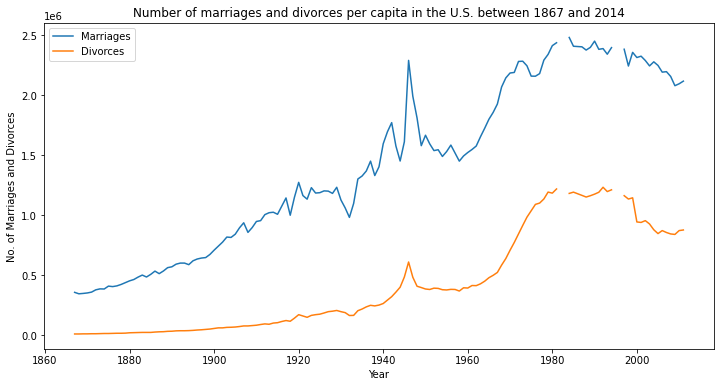

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(marriage_data.Year, marriage_data['Marriages'], label='Marriages')
plt.plot(marriage_data.Year, marriage_data['Divorces'], label='Divorces')
plt.title("Number of marriages and divorces per capita in the U.S. between 1867 and 2014")
plt.xlabel("Year")
plt.ylabel("No. of Marriages and Divorces");
plt.legend();

# Question 7 Python
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0, 0.5, 'No. of Marriages and Divroces')

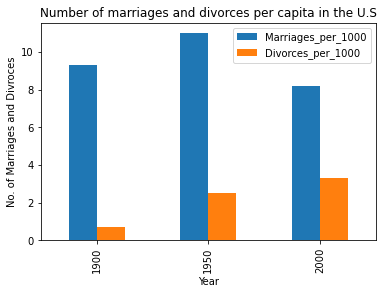

In [77]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

bar_chart = marriage_data[(marriage_data.Year == 1900) | (marriage_data.Year == 1950) | (marriage_data.Year == 2000)]
bar_chart = bar_chart.drop(columns = ['Marriages', 'Divorces', 'Population'])
bar_chart = bar_chart.set_index('Year')
bar_chart.plot.bar()
plt.title('Number of marriages and divorces per capita in the U.S')
plt.xlabel('Year')
plt.ylabel('No. of Marriages and Divroces')

# Question 8 Python
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

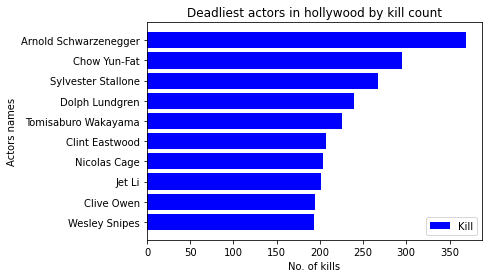

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('actor_kill_counts.csv')
data = data.sort_values(by="Count")

plt.barh(data['Actor'], data['Count'],  color='blue', label='Kill')
plt.xlabel('No. of kills')
plt.ylabel('Actors names')
plt.title('Deadliest actors in hollywood by kill count')
plt.legend()
plt.show()

# Question 9 Python
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

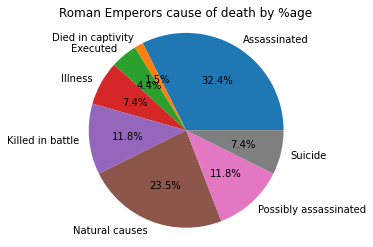

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('roman-emperor-reigns.csv')

pie_chart = data.groupby('Cause_of_Death').count()[['Emperor']]
emperor = pd.Series(pie_chart['Emperor'])
cause_death = pd.Series(pie_chart.index)
fig, ax = plt.subplots()
ax.pie(emperor, labels=cause_death,autopct='%1.1f%%')
ax.axis('equal')
plt.title('Roman Emperors cause of death by %age')
plt.show()

# Question 10 Python
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

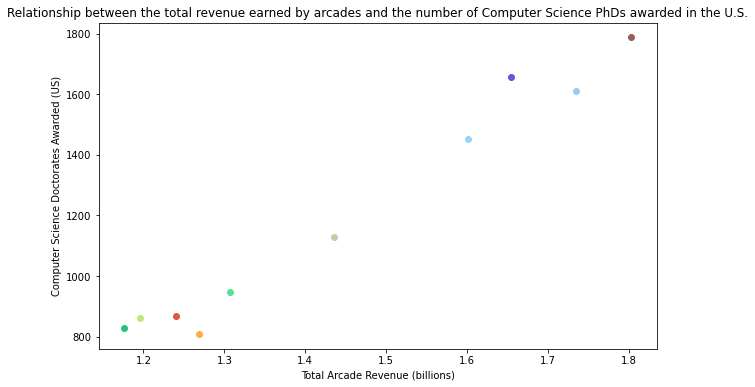

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


revenue_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
colors = {2000:'#C4E57D',2001:'#2AC280', 2002:'#FFAE39',2003:'#DC5B3B',2004:'#52E397', 2005:'#C5CBA3',2006:'#9CD5F6',2007:'#6E50D9', 2008:'#9A5E59',2009:'#9BC8F5'}
fig, ax = plt.subplots(figsize=(10,6))
for i in range (len(revenue_data['Total Arcade Revenue (billions)'])):
    ax.scatter(revenue_data['Total Arcade Revenue (billions)'][i],revenue_data['Computer Science Doctorates Awarded (US)'][i], color = colors[revenue_data['Year'][i]])
ax.set_title('Relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S.')
ax.set_xlabel('Total Arcade Revenue (billions)')
ax.set_ylabel('Computer Science Doctorates Awarded (US)')